<a href="https://colab.research.google.com/github/fellipecechinel/data-science-sigmoidal-projects/blob/main/Airbnb_Toronto_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Analysis of Airbnb data - *Toronto*

The [Airbnb](https://www.airbnb.com.br/) is considered **the biggest hotel company**, even without owning **any of the listed properties**!

It's an American company that operates an online marketplace for lodging, helping both travellers and property owners to access each other providing an aspirational, user-friendly platform.

Until the end of 2020, the startup founded 12 years ago had **hosted over half a billion guests**, being in 220 countries over the world.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we going to analyze data about the city of Toronto, and take a look at the insights we can extract from that.**

## Obtaining the data


All data used here was obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

For that initial exploratory analysis, we will use the following file:

* `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations).*

We will use data from 2021 December 5th for most of the questions and another three different dates for pricing variation at the end, with 2021 September 7th, 2021 June 4th and 2021 March 3rd

Ps: The files from the website are constantly updated, so to avoid broken links we gonna use these files saved from here:

[December 5th](https://drive.google.com/uc?id=12Dhlb9oF366YDCG_hJey6Hl8LsiApct4)

[September 7th](https://drive.google.com/uc?id=1bm0c6ZO140fyNP9juuwYTUywEugVzmvE)

[June 4th](https://drive.google.com/uc?id=1VqJOVs3YNmOceNmY53bjrhxQBnieYPJA)

[March 3th](https://drive.google.com/uc?id=1yuMt5wB0HE7ZEDuE3VEJvLbv0D0BBrTa)


With that being said, let's go to the project.

In [ ]:
#@title Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
#@title Import the file listings.csv to a DataFrame
dfDecember = pd.read_csv('https://drive.google.com/uc?id=12Dhlb9oF366YDCG_hJey6Hl8LsiApct4')

## Data analysis


### **Data Dictionary**

* `id` - Airbnb's unique identifier for the listing
* `name` - property listing name
* `host_id` - Airbnb's unique identifier for the host
* `host_name` - host name
* `neighbourhood_group` - this column has no values
* `neighbourhood` - neighbourhood name
* `latitude` - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* `longitude` - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
* `room_type` - Entire home/apt | Private room | Shared Room | Hotel Room
* `price` - daily price in local currency
* `minimum_nights` - minimum number of night stay for the listing
* `number_of_reviews` - The number of reviews the listing has
* `last_review` - The date of the last/newest review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - The number of listings the host has in the current scrape, in the city/region geography.
* `availability_365` - The availability of the listing 365 days in the future as determined by the calendar. Note a listing may be unavailable because it has been booked by a guest or blocked by the host.
* `number_of_reviews_ltm` - The number of reviews the listing has in the last 12 months
* `license` - property government license

Before starting any analysis, let's take a look at our *dataset*

In [ ]:
#@title Show the first 5 lines
dfDecember.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q1. How many columns and rows our dataset has? What are the types of columns??**

In [ ]:
#@title
print("Rows: {}".format(dfDecember.shape[0]))
print("Columns: {}\n".format(dfDecember.shape[1]))

dfDecember.dtypes

Rows: 15261
Columns: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. What is the percentage of missing values by column?**

In [ ]:
#@title
# order by percentages desc
round((dfDecember.isnull().sum() / dfDecember.shape[0]).sort_values(ascending=False) * 100,2)

neighbourhood_group               100.00
license                            66.86
reviews_per_month                  22.84
last_review                        22.84
host_name                           0.07
name                                0.01
number_of_reviews                   0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
id                                  0.00
minimum_nights                      0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
host_id                             0.00
price                               0.00
dtype: float64

### **Q3. What's the type of distribution of variables?** 

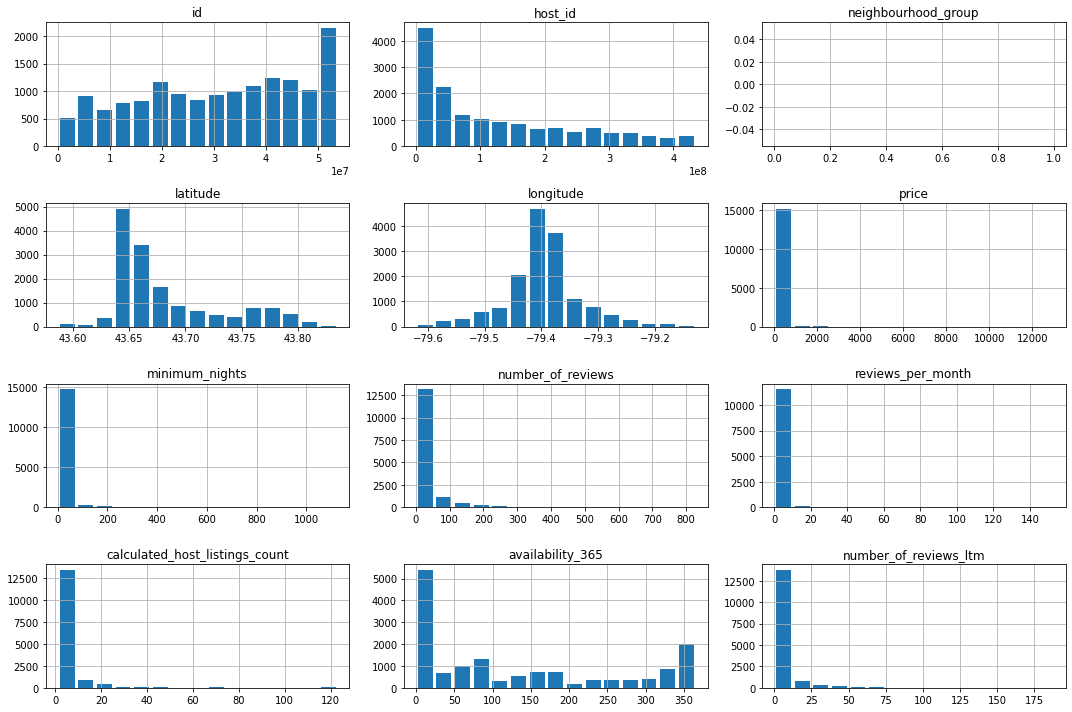

In [ ]:
#@title plot a histogram of numeric variables
dfDecember.hist(bins=15, figsize=(15,10), rwidth=0.8);
plt.tight_layout();
plt.show();

### **Q4. Are there *outliers*?**

Taking a look at the histograms we can identify some outliers for important variables as `price` and `minimum_nights` 

The values don't follow a distribution and they distorted the graphical representation.
To confirm it, there are two quick ways to help to identify outliers.
* A statistic summary using the method `describe()`
* Plot `boxplots` charts for a variable.



In [ ]:
#@title statistic summary
dfDecember[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,15261.000000,15261.000000
mean,155.451674,26.310792
std,371.197012,40.175750
min,0.000000,1.000000
25%,67.000000,5.000000
50%,101.000000,28.000000
75%,165.000000,28.000000
max,13000.000000,1125.000000


Now we can confirm some hypotheses like:
* The variable `price` has 75% of the values below 165, but the max value is 13000
* The minimum night has values of more than 365 days (the whole year)


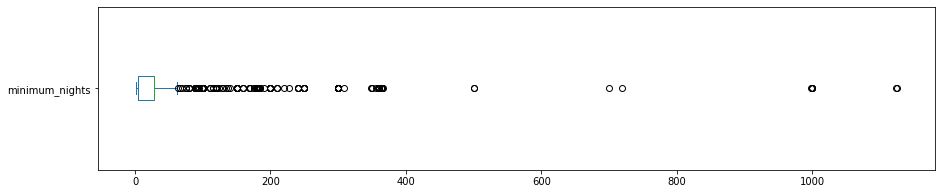


minimum_nights: values above 100:
305 rows
1.9986% of all rows


In [ ]:
#@title Boxplot for minimum_nights and percentage of values to exclude
dfDecember.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

daysToCut = 100;
print("\nminimum_nights: values above {}:".format(daysToCut));
print("{} rows".format(len(dfDecember[dfDecember.minimum_nights > daysToCut])));
print("{:.4f}% of all rows".format((len(dfDecember[dfDecember.minimum_nights > daysToCut]) / dfDecember.shape[0])*100));

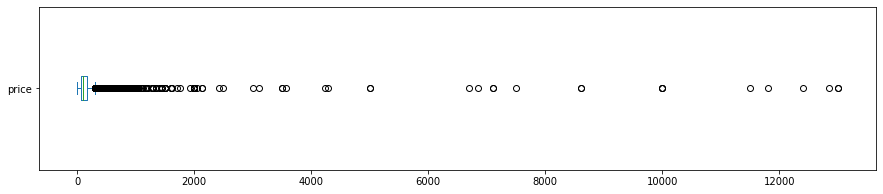


price: values above 650:
233 rows
1.5268% of all rows


In [ ]:
#@title Boxplot for price and percentage of values to exclude
dfDecember.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

priceToCut = 650;
print("\nprice: values above {}:".format(priceToCut));
print("{} rows".format(len(dfDecember[dfDecember.price > priceToCut])));
print("{:.4f}% of all rows".format((len(dfDecember[dfDecember.price > priceToCut]) / dfDecember.shape[0])*100));

Rows after all the cleanup: 14731


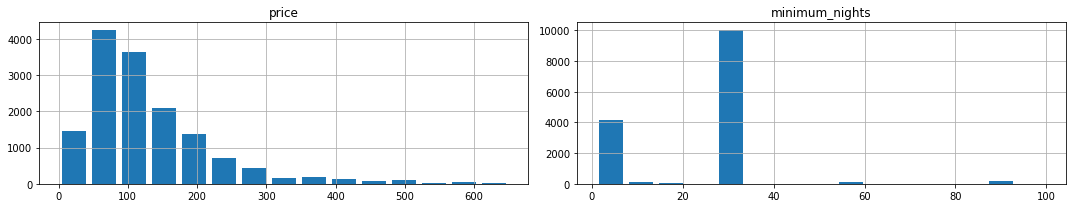

In [ ]:
#@title Since we've identified the outliers for the price and minimum nights variables, let's now clear the DataFrame and plot the histogram again
dfDecemberClean = dfDecember.copy()
dfDecemberClean.drop(dfDecemberClean[dfDecemberClean.price > priceToCut].index, axis=0, inplace=True)
dfDecemberClean.drop(dfDecemberClean[dfDecemberClean.minimum_nights > daysToCut].index, axis=0, inplace=True)

# remove `neighbourhood_group` because it's empty
dfDecemberClean.drop('neighbourhood_group', axis=1, inplace=True)

print("Rows after all the cleanup: {}".format(dfDecemberClean.shape[0]))

dfDecemberClean[['price','minimum_nights']].hist(bins=15, figsize=(15,3), rwidth=0.8);
plt.tight_layout();
plt.show();

### **Q5. What's the average daily price and the average minimum nights?**

In [ ]:
#@title
print('Avarage daily price: {}'.format(round(dfDecemberClean.price.mean(),2)));
print('Avarage minimum nights: {}'.format(round(dfDecemberClean.minimum_nights.mean(),0)));

Avarage daily price: 129.5
Avarage minimum nights: 22.0


### **Q6. What's the room type most rented on Airbnb?**

In [ ]:
#@title total
dfDecember.room_type.value_counts()

Entire home/apt    10057
Private room        4995
Shared room          189
Hotel room            20
Name: room_type, dtype: int64

In [ ]:
#@title percentage
round(dfDecember.room_type.value_counts() / dfDecember.shape[0] * 100, 2)

Entire home/apt    65.90
Private room       32.73
Shared room         1.24
Hotel room          0.13
Name: room_type, dtype: float64

### **Q7. What's the most expensive neighborhoods?**



In [ ]:
#@title list ordered by price
# dfDecember.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
dfDecemberClean.groupby(['neighbourhood']).agg(mean_price=('price', 'mean'), nr_hosts=('id', 'count')).sort_values("mean_price", ascending=False).reset_index().round(2)[:20]

,neighbourhood,mean_price,nr_hosts
0,Bridle Path-Sunnybrook-York Mills,237.77,13
1,Waterfront Communities-The Island,184.53,2590
2,Princess-Rosethorn,181.69,13
3,Lawrence Park South,167.21,43
4,The Beaches,163.45,137
5,Casa Loma,162.73,51
6,Niagara,162.53,571
7,Rosedale-Moore Park,158.76,63
8,Forest Hill South,156.15,20
9,South Riverdale,152.92,295


This list seems to be very accurate compared to this post: [These Are the 15 Most Expensive Neighbourhoods in Toronto]('https://storeys.com/most-expensive-neighbourhoods-toronto/')

**Bridle Path-Sunnybrook-York Mills** wins first place. 

The luxurious neighbourhood is characterized by large lots, allowing its upscale residents to have their dream home in close proximity to downtown Toronto. 

Over the years, Bridle Path has been home to celebrities and prominent figures including Prince, Celine Dion and Drake

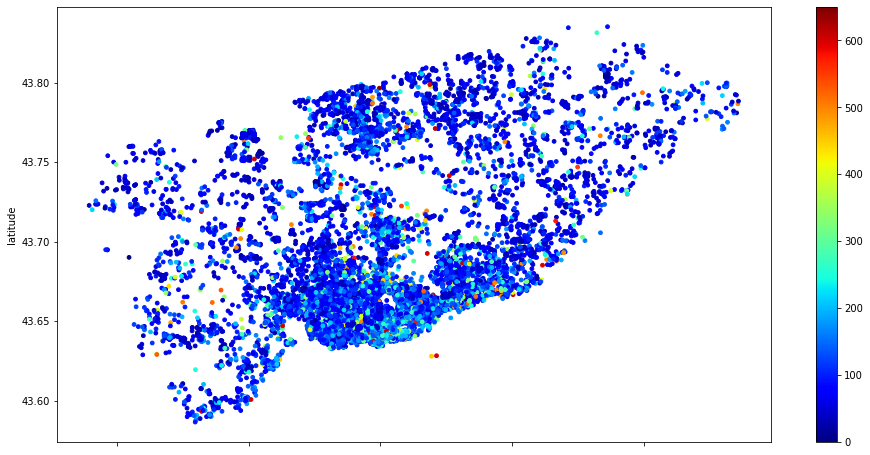

In [ ]:
#@title plot properties by longitude/latitude and price
dfDecemberClean.plot(kind="scatter", x='longitude', y='latitude', c=dfDecemberClean['price'], s=14,
              cmap=plt.get_cmap('jet'), figsize=(16,8));

### **Q8. What's the difference in pricing between the last three months and the current one being analyzed?**

In [ ]:
#@title import other months and clean-up the outliers using the same rules
dfSeptember = pd.read_csv('https://drive.google.com/uc?id=1bm0c6ZO140fyNP9juuwYTUywEugVzmvE', index_col='id');
dfJune = pd.read_csv('https://drive.google.com/uc?id=1VqJOVs3YNmOceNmY53bjrhxQBnieYPJA', index_col='id');
dfMarch = pd.read_csv('https://drive.google.com/uc?id=1yuMt5wB0HE7ZEDuE3VEJvLbv0D0BBrTa', index_col='id');

dfSeptemberClean = dfSeptember.copy();
dfSeptemberClean.drop(dfSeptemberClean[dfSeptemberClean.price > priceToCut].index, axis=0, inplace=True);
dfSeptemberClean.drop(dfSeptemberClean[dfSeptemberClean.minimum_nights > daysToCut].index, axis=0, inplace=True);

dfJuneClean = dfJune.copy();
dfJuneClean.drop(dfJuneClean[dfJuneClean.price > priceToCut].index, axis=0, inplace=True);
dfJuneClean.drop(dfJuneClean[dfJuneClean.minimum_nights > daysToCut].index, axis=0, inplace=True);

dfMarchClean = dfMarch.copy();
dfMarchClean.drop(dfMarchClean[dfMarchClean.price > priceToCut].index, axis=0, inplace=True);
dfMarchClean.drop(dfMarchClean[dfMarchClean.minimum_nights > daysToCut].index, axis=0, inplace=True);

In [ ]:
#@title create one dataset with all the months together
dfComparison = dfDecemberClean.copy();
dfComparison.set_index('id', inplace=True);

dfComparison = dfComparison.join(dfSeptemberClean, rsuffix='_september');
dfComparison = dfComparison.join(dfJuneClean, rsuffix='_june');
dfComparison = dfComparison.join(dfMarchClean, rsuffix='_march');

dfComparison = dfComparison.dropna(subset=['price_march'], axis=0);
dfComparison = dfComparison.dropna(subset=['price_june'], axis=0);
dfComparison = dfComparison.dropna(subset=['price_september'], axis=0);
dfComparison= dfComparison[dfComparison['price'] > 0]

print("Rows for comparison dataset after all cleanings: {}".format(dfComparison.shape[0]));

Rows for comparison dataset after all cleanings: 10955


In [ ]:
#@title mean price between all the months
dfComparison['diff_prices_september'] = dfComparison.apply(lambda row: row.price_september * 100 / row.price - 100, axis=1);
dfComparison['diff_prices_june'] = dfComparison.apply(lambda row: row.price_june * 100 / row.price - 100, axis=1);
dfComparison['diff_prices_march'] = dfComparison.apply(lambda row: row.price_march * 100 / row.price - 100, axis=1);

marchPriceMean = round(dfComparison.price_march.mean(),2);
junePriceMean = round(dfComparison.price_june.mean(),2);
septemberPriceMean = round(dfComparison.price_september.mean(),2);
priceMean = round(dfComparison.price.mean(),2);

print("Avarage daily price for March: {}".format(marchPriceMean));
print("Avarage daily price for June: {}".format(junePriceMean));
print("Avarage daily price for September: {}".format(septemberPriceMean));
print("Avarage daily price for December: {}".format(priceMean));
print("\nPs: note that the average price for December here can be different from our first analise because here we are just comparing properties that are in all the datasets")

Avarage daily price for March: 118.68
Avarage daily price for June: 121.6
Avarage daily price for September: 128.66
Avarage daily price for December: 126.04

Ps: note that the average price for December here can be different from our first analise because here we are just comparing properties that are in all the datasets


In [ ]:
#@title quantity of properties with no price change and describe() for the pricing between the months in percentage
marchNoChange = len(dfComparison[dfComparison.diff_prices_march == 0]);
juneNoChange = len(dfComparison[dfComparison.diff_prices_june == 0]);
septemberNoChange = len(dfComparison[dfComparison.diff_prices_september == 0]);

print("Properties with no pricing change from March to December: {} ({}%)".format( marchNoChange, (round(marchNoChange / dfComparison.shape[0] * 100,2)) ));
print("Properties with no pricing change from June to December: {} ({}%)".format(juneNoChange, (round(juneNoChange / dfComparison.shape[0] * 100,2)) ));
print("Properties with no pricing change from September to December: {} ({}%)".format(septemberNoChange, (round(septemberNoChange / dfComparison.shape[0] * 100,2)) ));

dfComparisonExcludingZero = dfComparison[['diff_prices_march', 'diff_prices_june', 'diff_prices_september']].replace(0, np.NaN);

round(dfComparisonExcludingZero[['diff_prices_march', 'diff_prices_june', 'diff_prices_september']].describe(),2)

Properties with no pricing change from March to December: 6836 (62.4%)
Properties with no pricing change from June to December: 7139 (65.17%)
Properties with no pricing change from September to December: 7846 (71.62%)


,diff_prices_march,diff_prices_june,diff_prices_september
count,4119.00,3816.00,3109.00
mean,-9.64,-5.81,7.92
std,45.15,35.81,38.34
min,-87.20,-90.05,-82.21
25%,-26.08,-21.28,-8.20
50%,-12.50,-9.09,-1.09
75%,-1.63,1.00,15.62
max,1445.45,900.00,776.47


Here we can see interesting information using the 75% percentile from **the properties with pricing difference**:
From March to December most of the properties increased 1.63%
From June to December most of the properties decreased 1.00%
From September to December most of the properties decreased 15.62%

So we can say that from these four months compared, September is the most expensive for Toronto

## Conclusions


Even using a dataset with fewer columns, we could find some nice insights about Toronto like an idea of pricing and neighbourhoods.

We could notice and treat some outliers in some important variables to increase the accuracy of the results.

We also saw that even in different months in the year, the price has not much difference, generally speaking.

For the next analysis, we could use the more complete dataset with more than 100 fields and we could go deeper to understand the comparison between prices for different years/months, using neighbourhoods and trying to understand the correlation between them.